## Introduction

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

The purpose of this project is to provide Thera Bank with an algorithm they can use when carrying out a loan campaign. The algorithm can be used by a business to devise a smarter campaign with higher target marketing. If the algorithm performs well, it will provide the business with high business value. They will save money and time by not marketing to irrelevant people while targeting the people who most likely will accept a loan offer.

Here are a few objectives that this project aimed to achieve:

- To execute and visualize exploratory data analysis
- To use logistic regression models to predict the likelihood of a customer buying a personal loan

**Data sources:**

The data set `Bank_Personal_Loan_Modelling.csv` was acquired from [kaggle.com](https://www.kaggle.com/datasets/mbsoroush/personal-loan-dataset).

## Scoping

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals; this section will define the high-level objectives and set the intentions for this project. The next section is the data. Luckily, in this project, data is already provided, but it still needs to be checked to see if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, including methods and questions that are aligned with the project goals. Lastly, an evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project, our goal is to build a model that will be used to predict which customer will most likely accept the offer for a personal loan based on the specific relationship with the bank across various features given in the dataset. The dataset will be analyzed using bivariate and multivariate logistic regression to identify the variables that significantly influence personal loan approvals by customers and to evaluate the best logistic regression model. Specifically, the project aims to achieve the following goals:

- To execute and visualize exploratory data analysis
- To use logistic regression models to predict the likelihood of a customer buying a personal loan

### Data

This project has the data set that came with the package. Provided `csv` file includes 5000 observations with fourteen variables divided into four different measurement categories. The binary category has five variables, including the target variable, personal loan, securities account, CD account, online banking, and credit card. The interval category contains five variables: age, experience, income, CC avg and mortgage. The ordinal category includes the variables family and education. The last category is nominal with ID and Zip code. The data set has fourteen variables, which are interpreted as follows:

1. `ID`: ID of the customer
1. `Age`: Age of the customer in completed years
1. `Experience`: Amount of work experience in years
1. `Income`: Amount of annual income in thousands
1. `Zipcode`: Postal code in which the client lives
1. `Family`: Number of family members
1. `CCAvg`: Average monthly spending with the credit card in thousands
1. `Education`: Education level (1: bachelor's degree, 2: master's degree, 3: advanced/professional degree)
1. `Mortgage`: Value of home mortgage, if any, in thousands
1. `Securities` Account: Does the customer have a securities account with the bank?
1. `CD Account`: Does the customer have a certificate of deposit account (CD) with the bank?
1. `Online`: Does the customer use the internet banking facilities?
1. `CreditCard`: Does the customer use a credit card issued by the bank?
1. `Personal Loan`: Did this customer accept the personal loan offered in the last campaign? (Target Variable)

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. The dataset will be summarized and analyzed by using bivariate and multivariate logistic regression.

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

## Import Python Modules

First, import the primary modules that will be used in this project.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Then suppress warnings.

In [91]:
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

To analyze personal information and the status of the bank's clients, load the datasets into `DataFrame`. Once loaded as `DataFrame` the data can be explored and visualized using Python.

In the following steps, `Bank_Personal_Loan_Modelling.csv` is read as `DataFrame` and is called `df` respectively. The newly created `DataFrame` is glimpsed with `.describe()` and a custom function `.check()` is defined to assess the data types, unique values, and null values for each column.

In [92]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [93]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [94]:
def check(df):
    list = []
    columns = df.columns
    for col in columns:
        data_types = df[col].dtypes
        unique_values = df[col].nunique()
        null_values = df[col].isnull().sum()
        list.append([col, data_types, unique_values, null_values])
    df_check = pd.DataFrame(list)
    df_check.columns = ['column', 'data types', 'unique values', 'null values']
    return df_check
check(df)

,column,data types,unique values,null values
0,ID,int64,5000,0
1,Age,int64,45,0
2,Experience,int64,47,0
3,Income,int64,162,0
4,ZIP Code,int64,467,0
5,Family,int64,4,0
6,CCAvg,float64,108,0
7,Education,int64,3,0
8,Mortgage,int64,347,0
9,Personal Loan,int64,2,0


We will proceed by converting negative values to positive values, conducting a thorough check for duplicate data, and eliminating any redundant columns from the dataset.

In [95]:
df['Experience'] = abs(df['Experience'])

In [96]:
df.duplicated().sum()

0

In [97]:
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
df.shape

(5000, 12)

## Analysis

#### Exploratory Data Analysis

Upon completion of the dataset evaluation, a more comprehensive analysis can be achieved through the application of various visualization techniques such as `pair-plots`, `heatmap correlation metrics`, and `histograms`. Initially, the dataset will be visualized using histograms to assess its distribution.

In [98]:
red = '#b40426'
blue = '#4169E1'
custom_palette = [blue, red]

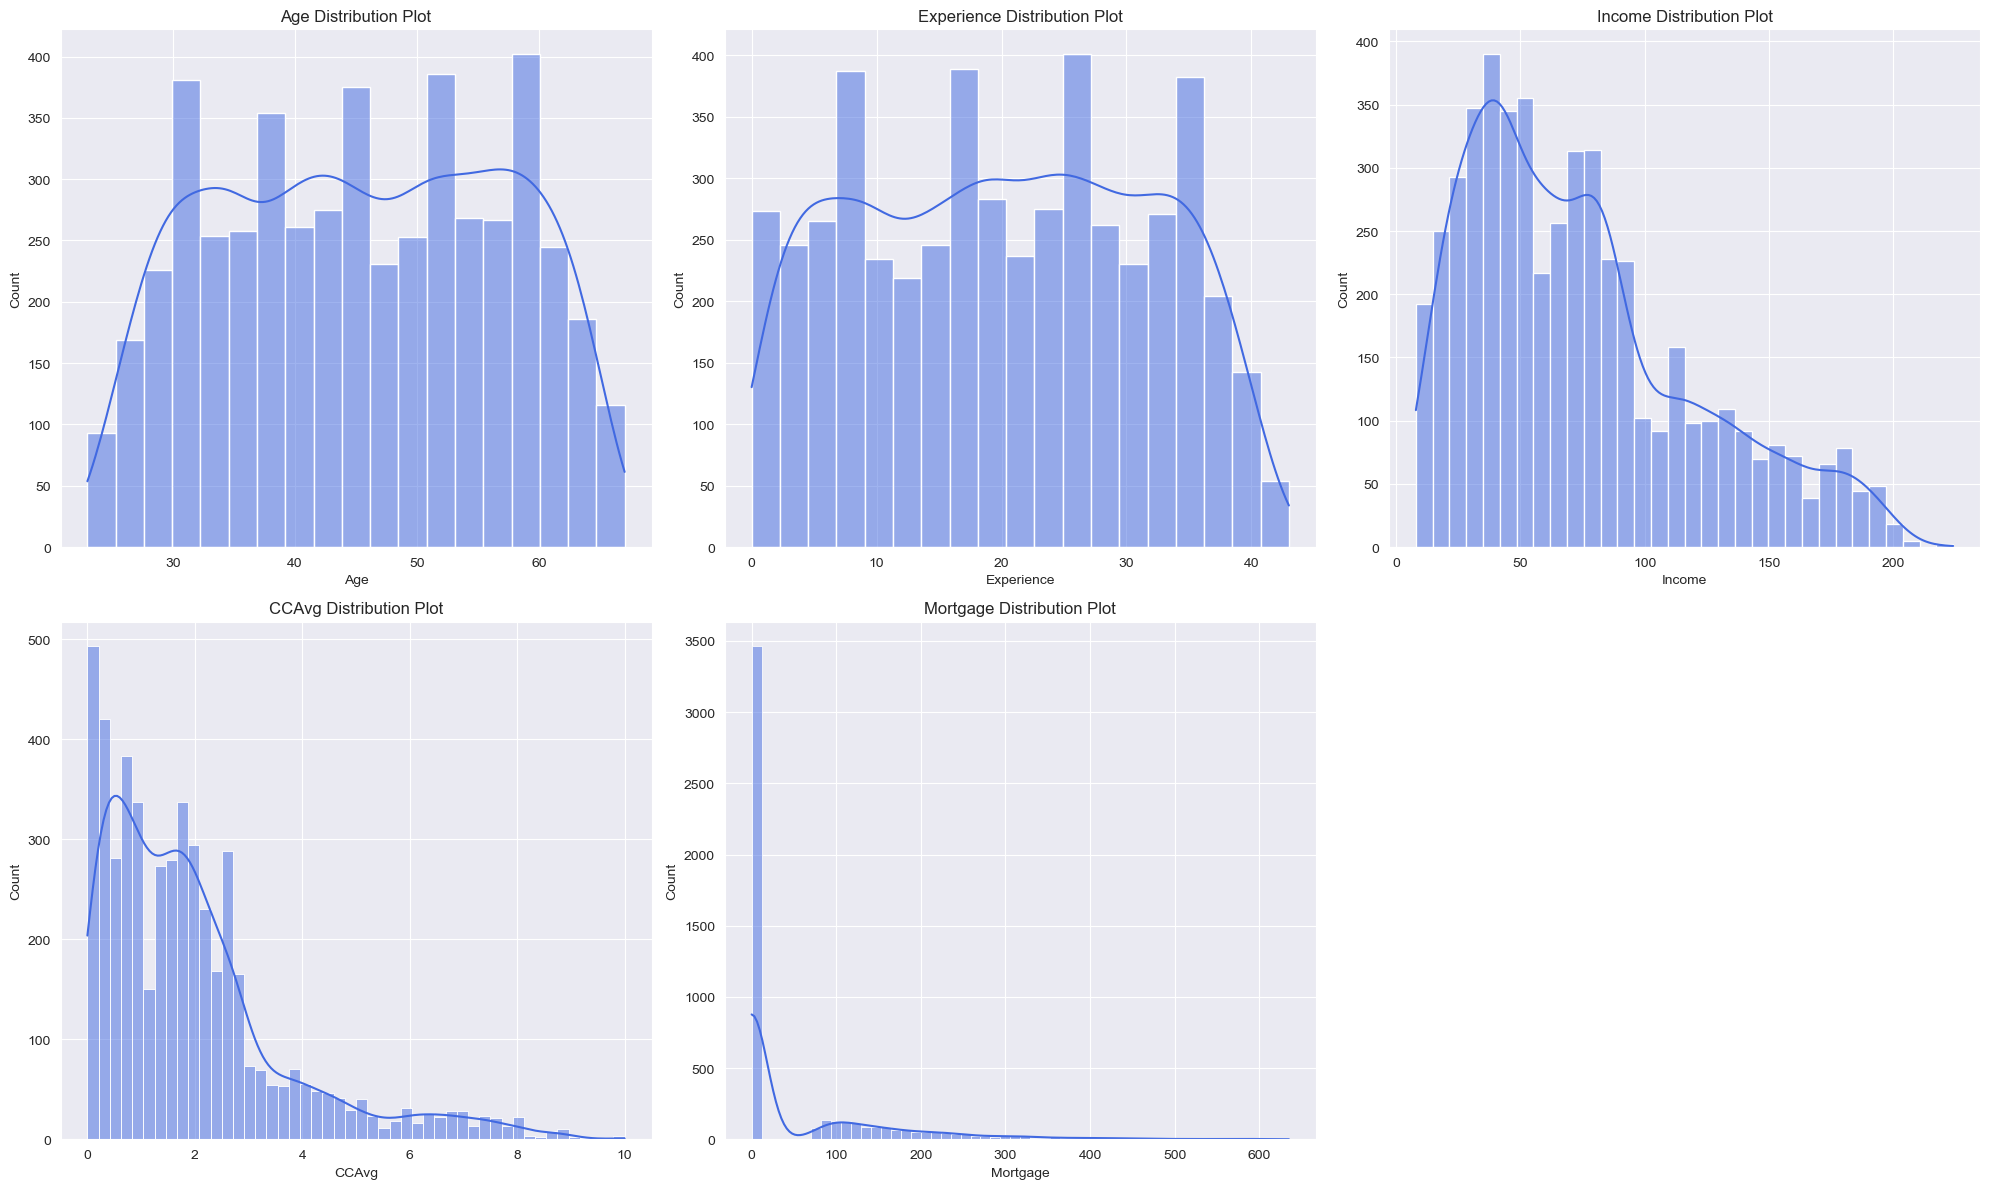

In [99]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
sns.set_style('darkgrid')

axs[0, 0].set_title('Age Distribution Plot')
sns.histplot(df.Age, ax=axs[0, 0], color=custom_palette[0], kde=True)

axs[0, 1].set_title('Experience Distribution Plot')
sns.histplot(df.Experience, ax=axs[0, 1], color=custom_palette[0], kde=True)

axs[0, 2].set_title('Income Distribution Plot')
sns.histplot(df.Income, ax=axs[0, 2], color=custom_palette[0], kde=True)

axs[1, 0].set_title('CCAvg Distribution Plot')
sns.histplot(df.CCAvg, ax=axs[1, 0], color=custom_palette[0], kde=True)

axs[1, 1].set_title('Mortgage Distribution Plot')
sns.histplot(df.Mortgage, ax=axs[1, 1], color=custom_palette[0], kde=True)

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

The histogram visualization shows that income, mortgage value, and average credit card spending (CCAvg) have a skewed distribution with a long right tail, meaning most values are lower with a few higher ones stretching the distribution. In contrast, the variables Age and Experience follow a normal distribution, where values are centered around the mean.

Thus, the explanation of the dataset through heatmap correlation metrics:

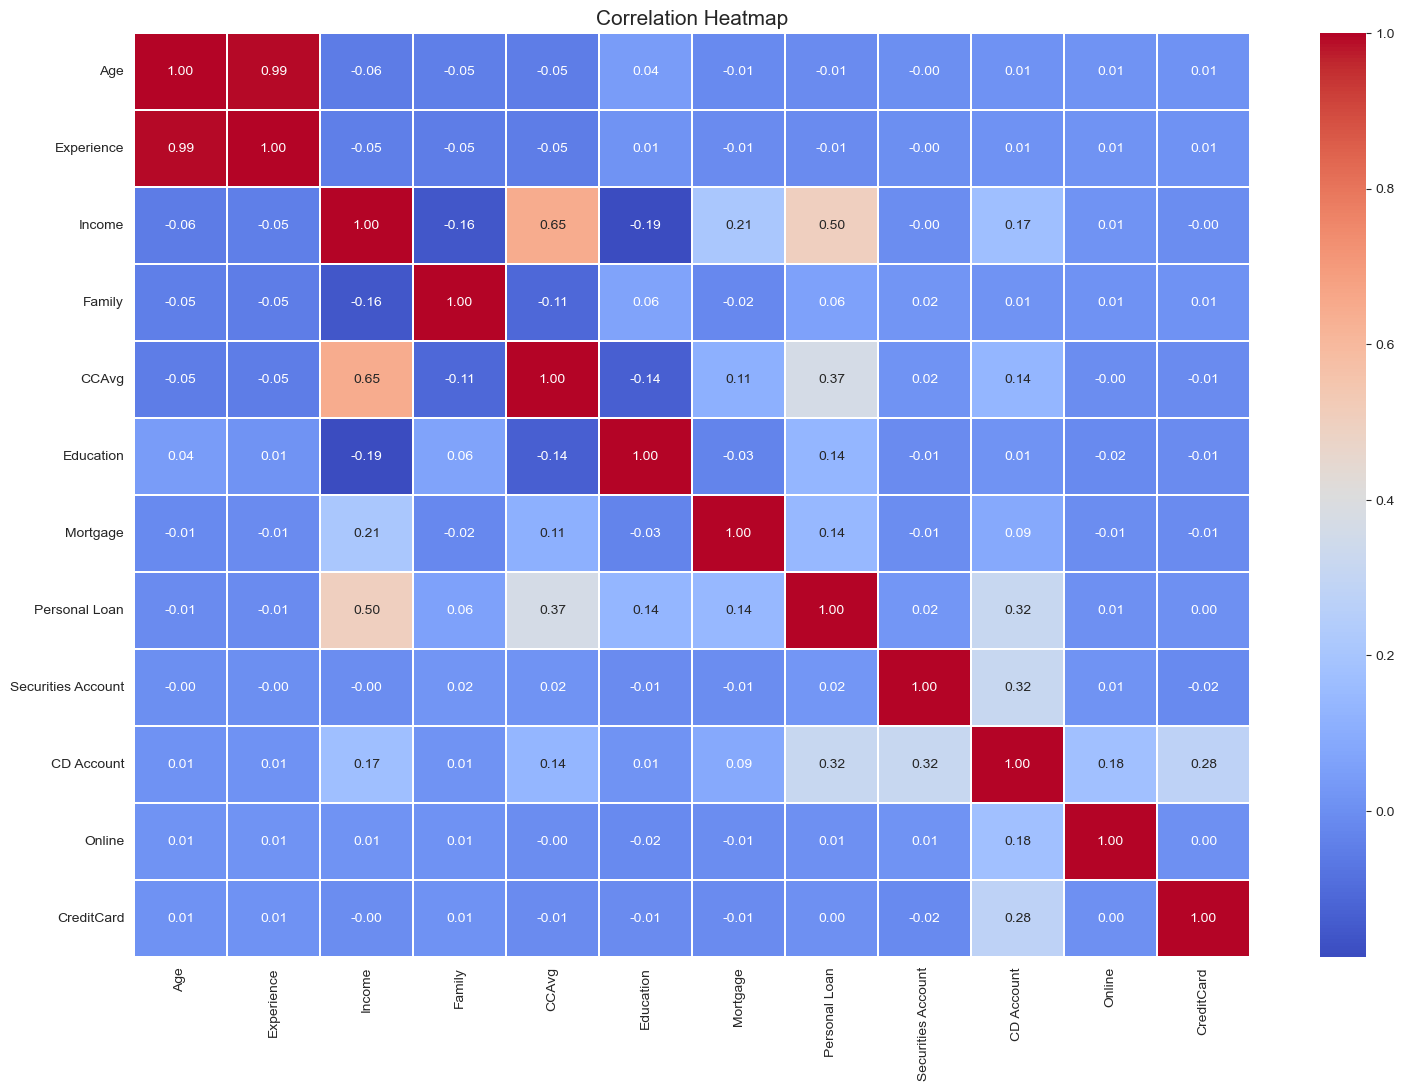

In [100]:
fig = plt.gcf()
fig.set_size_inches(18, 12)
plt.title('Correlation Heatmap', size=15)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.2)
plt.show()

The heatmap correlation shows that the age and experience variables have a nearly perfect positive correlation, with a value of 0.99. The relationship between income and average credit card spending is moderately positive, with a correlation of 0.65. There is also a moderate positive correlation of 0.5 between personal loans and income. Lastly, personal loans and average credit card spending exhibit a weaker positive correlation, measured at 0.37.

Furthermore, explanation of the dataset through pair-plot:

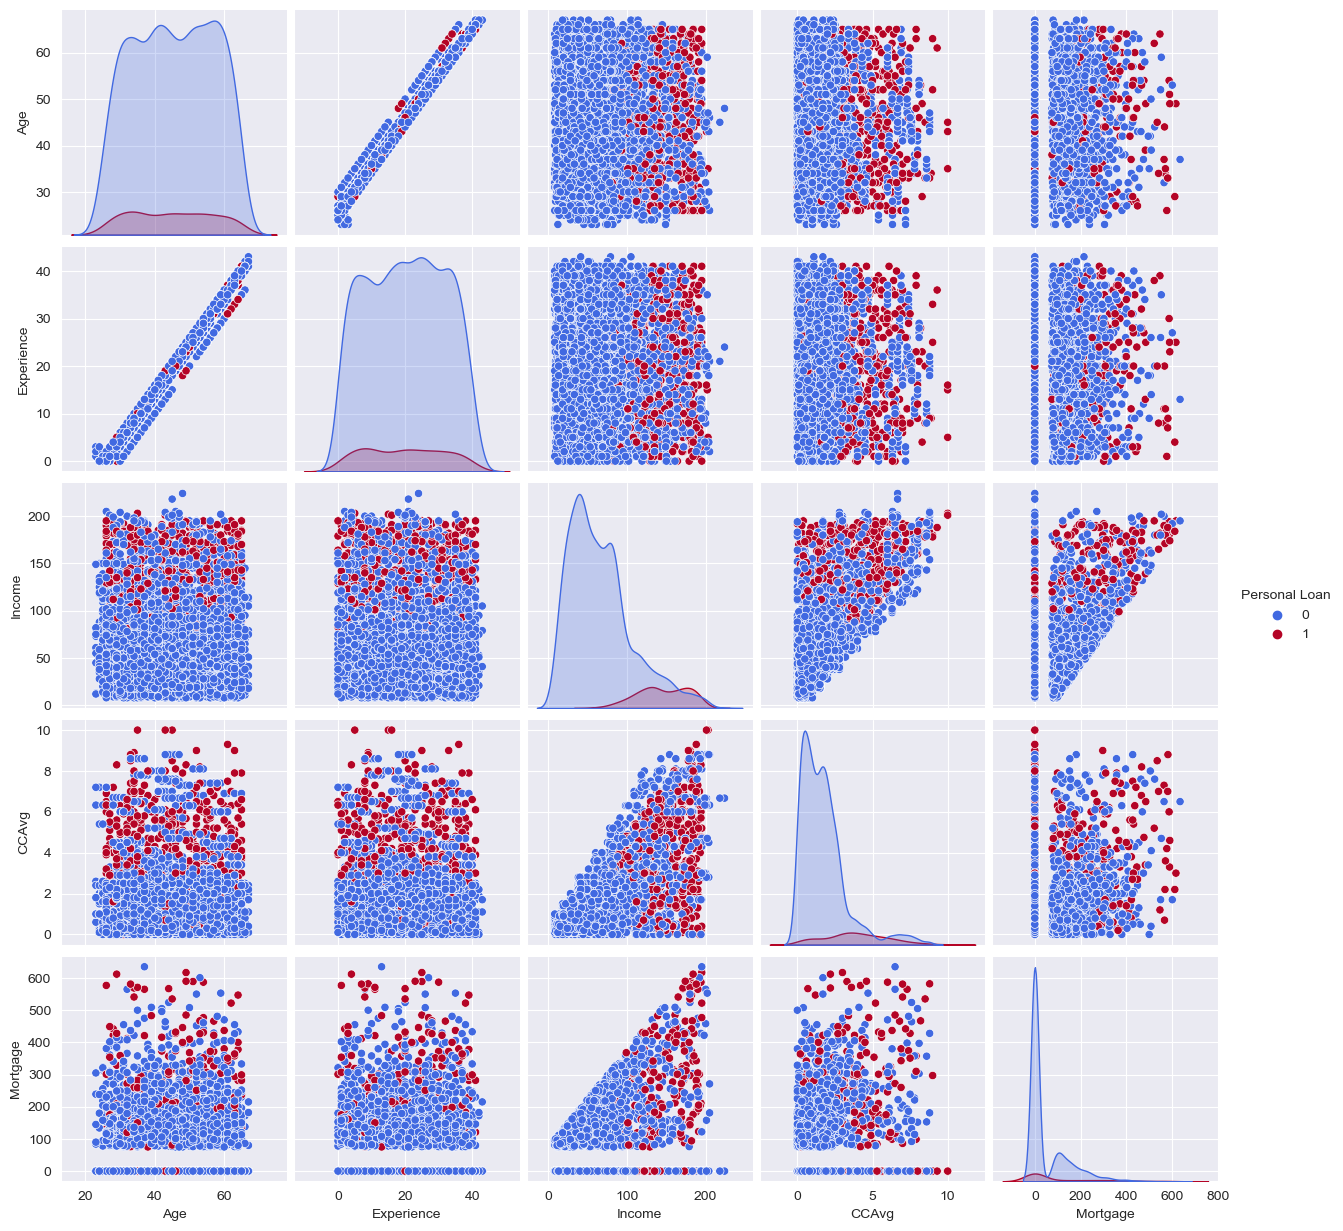

In [101]:
sns.pairplot(data=df[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan']], 
             hue='Personal Loan', palette=custom_palette)

The pair-plot visualization reveals the distribution of personal loans across various variables. It indicates that individuals with higher incomes are more likely to approve personal loans compared to those with lower incomes. A similar trend is observed in the experience variable, where people with more experience are more inclined to approve loans. Additionally, customers with higher average credit card spending and greater mortgage values tend to approve personal loans more frequently than those who decline them.

#### Bivariate Logistic Regression

Bivariate logistic regression is a form of logistic regression that models the combined probability of two binary outcome variables based on a set of explanatory variables. It has advantages such as optimizing the joint probability distribution and capturing the odds ratio, representing the association between the two outcome variables.

In this step, we create a dataset for each variable using a bivariate logistic regression model. The personal loan variable serves as the dependent variable or the output, while Age, Experience, Income, CCAvg, Mortgage, Education, and Family are treated as the predictor or independent variables in the logistic regression model.

##### Independent variable (Age) and dependent variable (Personal Loan)

In [102]:
x_age = df[['Age']]
y_personal_loan = df['Personal Loan']

x_age = sm.add_constant(x_age)
logit_model_age = sm.Logit(y_personal_loan, x_age)
result_age = logit_model_age.fit()

print(result_age.summary())

Optimization terminated successfully.
         Current function value: 0.316174
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:               9.436e-05
Time:                        23:00:02   Log-Likelihood:                -1580.9
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                    0.5849
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1390      0.195    -10.978      0.000      -2.521      -1.757
Age           -0.0023      0.

Based on the logistic regression model between `Personal Loan` and `Age`:
- The negative coefficient suggests that as age increases, the likelihood of personal loan approval decreases.
- If age increases by one year, the probability of approving a personal loan decreases by 0.0023.
- According to the "Divide by 4 Rule", for average experience units, an additional year of experience corresponds to approximately a 0.06% (0.0023/4) decrease in the likelihood of personal loan acceptance.


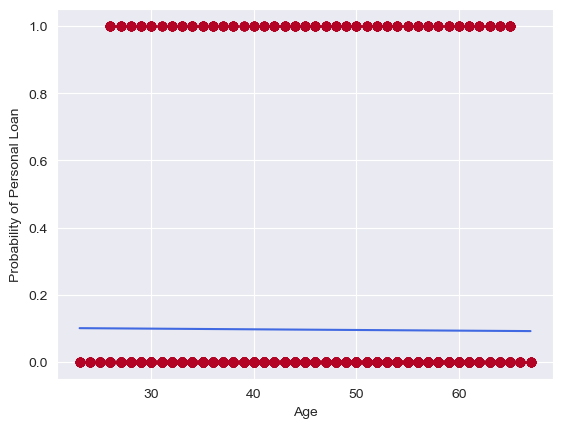

In [103]:
plt.scatter(df['Age'], df['Personal Loan'], color=red)

x_range = np.linspace(df['Age'].min(), df['Age'].max(), 100)
x_range_const = sm.add_constant(x_range)
y_range = result_age.predict(x_range_const)
plt.plot(x_range, y_range, color=blue)

plt.xlabel('Age')
plt.ylabel('Probability of Personal Loan')
plt.show()

The linear logistic regression curve shows that the results are consistent with the regression outputs, and the fitted curve has a slight downward slope.

##### Independent variable (Experience) and dependent variable (Personal Loan)

In [104]:
x_expirience = df[['Experience']]

x_expirience = sm.add_constant(x_expirience)
logit_model_expirience = sm.Logit(y_personal_loan, x_expirience)
result_expirience = logit_model_expirience.fit()

print(result_expirience.summary())

Optimization terminated successfully.
         Current function value: 0.316170
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:               0.0001090
Time:                        23:00:02   Log-Likelihood:                -1580.8
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                    0.5571
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1931      0.096    -22.749      0.000      -2.382      -2.004
Experience    -0.0025      0.

Based on the logistic regression model between `Personal Loan` and `Experience`:
- The negative coefficient suggests that as experience increases, the likelihood of personal loan approval decreases.
- If experience increases by one year, the probability of approving a personal loan decreases by 0.0023.
- According to the "Divide by 4 Rule", for average experience units, an additional year of experience corresponds to approximately a 0.06% (0.0023/4) decrease in the likelihood of personal loan acceptance.

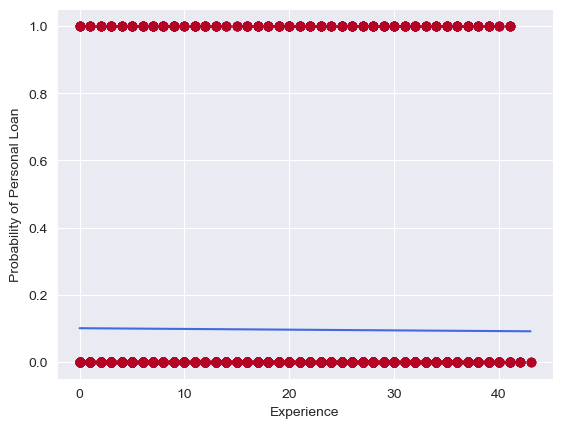

In [105]:
plt.scatter(df['Experience'], df['Personal Loan'], color=red)

x_range = np.linspace(df['Experience'].min(), df['Experience'].max(), 100)
x_range_const = sm.add_constant(x_range)
y_range = result_expirience.predict(x_range_const)
plt.plot(x_range, y_range, color=blue)

plt.xlabel('Experience')
plt.ylabel('Probability of Personal Loan')
plt.show()

The linear logistic regression curve shows that the results are consistent with the regression outputs, and the fitted curve has a slight downward slope.

##### Independent variable (Income) and dependent variable (Personal Loan)

In [106]:
x_income = df[['Income']]

x_income = sm.add_constant(x_income)
logit_model_income = sm.Logit(y_personal_loan, x_income)
result_income = logit_model_income.fit()

print(result_income.summary())

Optimization terminated successfully.
         Current function value: 0.201623
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.3624
Time:                        23:00:03   Log-Likelihood:                -1008.1
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                3.652e-251
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1273      0.186    -32.926      0.000      -6.492      -5.763
Income         0.0371      0.

Based on the logistic regression model between `Personal Loan` and `Income`:
- The positive coefficient suggests that as income increases, the likelihood of personal loan approval rises as well.
- If Income increases by one thousand dollars, the probability of approving a personal loan increases by 0.0371.
- According to the "Divide by 4 Rule", for the average income, an additional thousand dollars in income corresponds to an approximately 0.93% (0.0371/4) increase in the likelihood of personal loan acceptance.

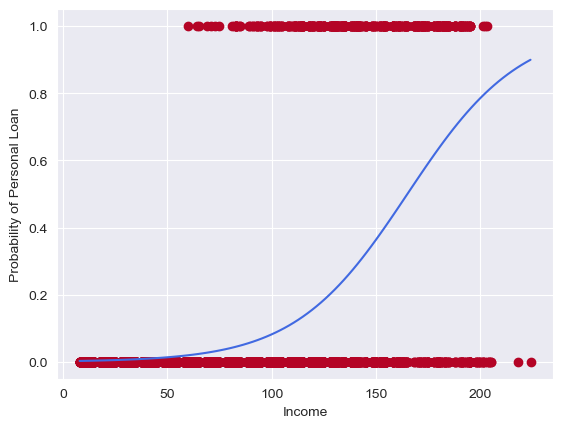

In [107]:
plt.scatter(df['Income'], df['Personal Loan'], color=red)

x_range = np.linspace(df['Income'].min(), df['Income'].max(), 100)
x_range_const = sm.add_constant(x_range)
y_range = result_income.predict(x_range_const)
plt.plot(x_range, y_range, color=blue)

plt.xlabel('Income')
plt.ylabel('Probability of Personal Loan')
plt.show()

The sigmoidal shape logistic regression curve shows that the results are consistent with the regression outputs and clarifies that variable income is one significant predictor of personal loan acceptance.

##### Independent variable (CCAvg) and dependent variable (Personal Loan)

In [108]:
x_CCAvg = df[['CCAvg']]

x_CCAvg = sm.add_constant(x_CCAvg)
logit_model_CCAvg = sm.Logit(y_personal_loan, x_CCAvg)
result_CCAvg = logit_model_CCAvg.fit()

print(result_CCAvg.summary())

Optimization terminated successfully.
         Current function value: 0.265308
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.1610
Time:                        23:00:03   Log-Likelihood:                -1326.5
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                1.067e-112
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5850      0.091    -39.270      0.000      -3.764      -3.406
CCAvg          0.5116      0.

Based on the logistic regression model between `Personal Loan` and `CCAvg`:
- The positive coefficient suggests that as income increases, the likelihood of personal loan approval rises as well.
- If credit card spending increases by one thousand dollars, the probability of approving a personal loan increases by 0.5116.
- According to the "Divide by 4 Rule", for the average credit card spending, an additional thousand dollars in credit card average spending corresponds to an approximately 12.79% (0.5116/4) increase in the likelihood of personal loan acceptance.

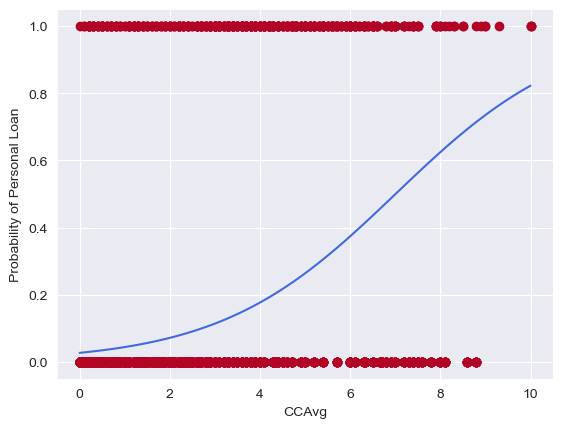

In [109]:
plt.scatter(df['CCAvg'], df['Personal Loan'], color=red)

x_range = np.linspace(df['CCAvg'].min(), df['CCAvg'].max(), 100)
x_range_const = sm.add_constant(x_range)
y_range = result_CCAvg.predict(x_range_const)
plt.plot(x_range, y_range, color=blue)

plt.xlabel('CCAvg')
plt.ylabel('Probability of Personal Loan')
plt.show()

The sigmoidal shape logistic regression curve shows that the results are consistent with the regression outputs and clarifies that variable CCAvg is one significant predictor of personal loan acceptance.

##### Independent variable (Mortgage) and dependent variable (Personal Loan)

In [110]:
x_mortgage = df[['Mortgage']]

x_mortgage = sm.add_constant(x_mortgage)
logit_model_mortgage = sm.Logit(y_personal_loan, x_mortgage)
result_mortgage = logit_model_mortgage.fit()

print(result_mortgage.summary())

Optimization terminated successfully.
         Current function value: 0.307944
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                 0.02612
Time:                        23:00:03   Log-Likelihood:                -1539.7
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                 1.004e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5063      0.059    -42.313      0.000      -2.622      -2.390
Mortgage       0.0036      0.

Based on the logistic regression model between `Personal Loan` and `Mortgage`:
-	The positive coefficient suggests that with a higher Mortgage value, the likelihood of personal loan approval is higher as well.
-	If the Mortgage increases by one thousand dollars, the probability of approving a personal loan increases by 0.0036.
-	According to the "Divide by 4 Rule", for the average mortgage value, an additional thousand dollars in income corresponds to an approximately 0.09% (0.0036/4) increase in the likelihood of personal loan acceptance.

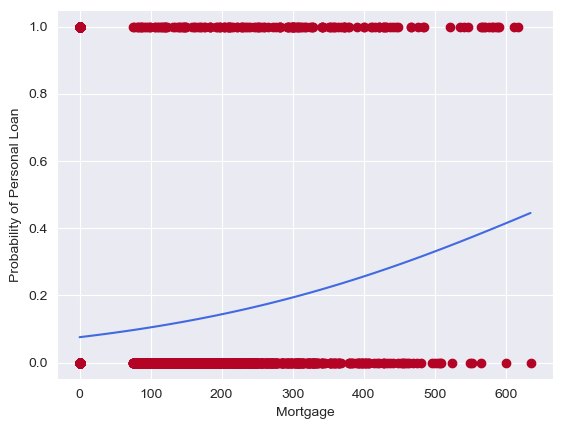

In [111]:
plt.scatter(df['Mortgage'], df['Personal Loan'], color=red)

x_range = np.linspace(df['Mortgage'].min(), df['Mortgage'].max(), 100)
x_range_const = sm.add_constant(x_range)
y_range = result_mortgage.predict(x_range_const)
plt.plot(x_range, y_range, color=blue)

plt.xlabel('Mortgage')
plt.ylabel('Probability of Personal Loan')
plt.show()

The increasing concave shape logistic regression curve shows that the results are consistent with the regression outputs and clarifies that mortgage value is one significant predictor of personal loan acceptance.

##### Independent variable (Education) and dependent variable (Personal Loan)

In [112]:
x_education = df[['Education']]

x_education = sm.add_constant(x_education)
logit_model_education = sm.Logit(y_personal_loan, x_education)
result_education = logit_model_education.fit()

print(result_education.summary())

Optimization terminated successfully.
         Current function value: 0.306905
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                 0.02941
Time:                        23:00:04   Log-Likelihood:                -1534.5
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                 5.264e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3742      0.138    -24.484      0.000      -3.644      -3.104
Education      0.5549      0.

Based on the logistic regression model between `Personal Loan` and `Education`:
-	The positive coefficient suggests that with a higher education value, the likelihood of personal loan approval is higher as well.
-	If education increases by 1, the probability of approving a personal loan increases by 0.5549.
- According to the "Divide by 4 Rule", for average education, one additional unit of experience corresponds to approximately a 13.87% (0.5549/4) increase in the likelihood of personal loan acceptance.

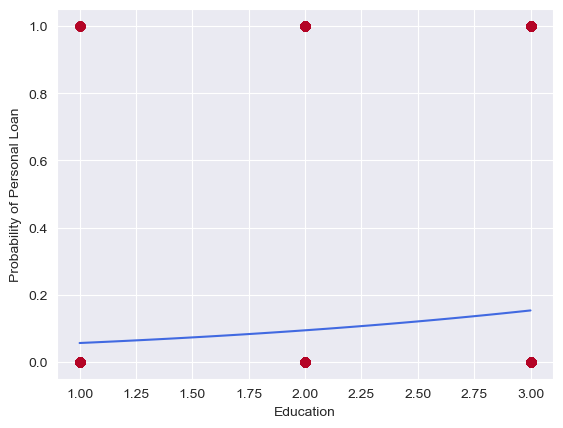

In [113]:
plt.scatter(df['Education'], df['Personal Loan'], color=red)

x_range = np.linspace(df['Education'].min(), df['Education'].max(), 100)
x_range_const = sm.add_constant(x_range)
y_range = result_education.predict(x_range_const)
plt.plot(x_range, y_range, color=blue)

plt.xlabel('Education')
plt.ylabel('Probability of Personal Loan')
plt.show()

The linear logistic regression curve shows that the results are consistent with the regression outputs, and the fitted curve has a slight upward slope.

##### Independent variable (Family) and dependent variable (Personal Loan)

In [114]:
x_family = df[['Family']]

x_family = sm.add_constant(x_family)
logit_model_family = sm.Logit(y_personal_loan, x_family)
result_family = logit_model_family.fit()

print(result_family.summary())

Optimization terminated successfully.
         Current function value: 0.314329
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                0.005929
Time:                        23:00:04   Log-Likelihood:                -1571.6
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                 1.492e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6931      0.119    -22.723      0.000      -2.925      -2.461
Family         0.1807      0.

Based on the logistic regression model between `Personal Loan` and `Family`:
-	The positive coefficient suggests that with a higher family value, the likelihood of personal loan approval is higher as well.
-	If the family increases by 1, the probability of approving a personal loan increases by 0.1807.
- According to the "Divide by 4 Rule", for average Family value, one additional unit of Family value corresponds to approximately a 4.52% (0.1807/4) increase in the likelihood of personal loan acceptance.

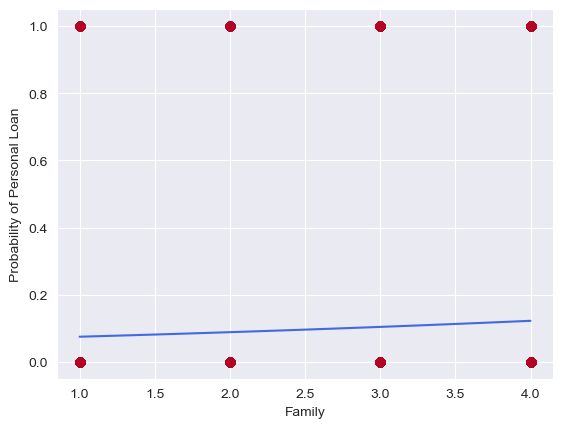

In [115]:
plt.scatter(df['Family'], df['Personal Loan'], color=red)

x_range = np.linspace(df['Family'].min(), df['Family'].max(), 100)
x_range_const = sm.add_constant(x_range)
y_range = result_family.predict(x_range_const)
plt.plot(x_range, y_range, color=blue)

plt.xlabel('Family')
plt.ylabel('Probability of Personal Loan')
plt.show()

The linear logistic regression curve shows that the results are consistent with the regression outputs, and the fitted curve has a slight upward slope.

#### Multivariate Logistic Regression

In [116]:
x_multivariate = df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Education', 'Family']]

x_multivariate = sm.add_constant(x_multivariate)
logit_model_multivariate = sm.Logit(y_personal_loan, x_multivariate)
result_multivariate = logit_model_multivariate.fit()

print(result_multivariate.summary())

Optimization terminated successfully.
         Current function value: 0.146026
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4992
Method:                           MLE   Df Model:                            7
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.5382
Time:                        23:00:04   Log-Likelihood:                -730.13
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.8072      1.463     -8.753      0.000     -15.675      -9.940
Age           -0.0376      0.

Based on the multivariate logistic regression model of `Personal Loan`:
-	A positive coefficient suggests a higher likelihood of accepting personal loans.
-	A negative coefficient suggests a lower likelihood of accepting a personal loan with each increase in the related variable.
-	A result of a one-unit change in a positive coefficient is a positive change in the log odds of accepting the personal loan.

Upon comparing these coefficients, it may be inferred that Education and Family exert a more significant influence than other factors in determining the likelihood of approving a personal loan. However, it's important to note that this statement could be misleading. One way to assess this is by looking at the standard deviation value:

In [117]:
std_deviation = df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Education', 'Family']].std()
std_deviation

Age            11.463166
Experience     11.415189
Income         46.033729
CCAvg           1.747659
Mortgage      101.713802
Education       0.839869
Family          1.147663
dtype: float64

Upon obtaining the standard deviation value for the scoped variables, it is necessary to multiply it by the Logistic Regression coefficient to derive the standardized coefficient. This standardized coefficient aids in comparing the effects of different variables in a model, particularly when they are measured on different scales. Subsequently, employing the "Divide by 4 Rule" allows us to ascertain the approximate percentage change in the probability of the outcome when the independent variable changes by one standard deviation.

In [118]:
coefficients = result_multivariate.params
standardized_coefficient = coefficients * std_deviation
standardized_coefficient_by_4 = round((standardized_coefficient / 4 * 100).drop('const').sort_values(ascending=False), 2)
standardized_coefficient_by_4

Income        62.16
Education     35.23
Family        19.71
Experience    14.24
CCAvg          5.71
Mortgage       1.66
Age          -10.77
dtype: float64

Based on the result of standard deviation from the multivariate logistic regression model of personal loan with "Divide by 4 Rule" employment, a difference of 1 standard deviation in variable:
-	`Income` corresponds to an approximately `62.14% positive difference` in the probability of approving the personal loan.
-	`Education` corresponds to an approximately `35.23% positive difference` in the probability of approving the personal loan.
-	`Family` corresponds to an approximately `19.74% positive difference` in the probability of approving the personal loan.
-	`Experience` corresponds to an approximately `14.24% positive difference` in the probability of approving the personal loan.
-	`CCAvg` corresponds to an approximately `5.71% positive difference` in the probability of approving the personal loan.
-	`Mortgage` corresponds to an approximately `1.52% positive difference` in the probability of approving the personal loan.
-	`Age` corresponds to an approximately `10.74% negative difference` in the probability of approving the personal loan.

The order of the probability of approving a personal loan from highest to lowest:

Income > Education > Family > Experience > CreditCardAverageSpending > Mortgage > Age

## Conclusions

The project's findings have provided valuable business insights for the banking industry, particularly in the areas of decision-making and business strategy for enhancing the process of customer selection for personal loan approvals. The regression analysis was intentionally designed to encompass both bivariate and multivariate approaches, with the objective of evaluating existing customer characteristics and their familiarity with banking products. This enabled the identification of key predictor variables within the model to assess the likelihood of a customer's personal loan approval.

In the bivariate model, the influential predictor variables are ranked as follows:

Education > CCAvg > Family > Income > Mortgage > Age > Experience

In the assessment, a multivariate logistic regression model was conducted to evaluate the relationships between predictor variables and personal loans. This approach is particularly suitable when all predictor variables are known or owned by the customer. Unlike bivariate logistic regression, the multivariate model accounts for changes in coefficients and significance levels, leading to a reordering of the best variables. Notably, the predictor variable "experience" exhibited a shift from a negative relationship with personal loans in the bivariate model to a positive relationship in the multivariate logistic regression model.

The revised order of the predictor variables based on their effectiveness is as follows:

Income > Education > Family > Experience > CreditCardAverageSpending > Mortgage > Age

In conclusion, when conducting an assessment with either bivariate analysis or considering only one predictor variable, priority should be given to the education variable. Higher levels of education among customers correspond to a higher probability of accepting a personal loan. In contrast, when conducting a multivariate analysis considering all predictor variables, the income variable should be prioritized. A higher income among customers is associated with an increased probability of accepting a personal loan.